## Linear Regression using ANN

### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Importing dataset

Using `Churn_Modelling` dataset to predit which of the customers are more likely to leave the bank soon.

Source: https://www.kaggle.com/datasets/filippoo/deep-learning-az-ann

In [2]:
df = pd.read_csv(r'C:\Users\lenovo\Downloads\Churn_Modelling.csv')
df.set_index("CustomerId", inplace = True)
df.head(10)

,RowNumber,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CustomerId,,,,,,,,,,,,,
15634602,1,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
15647311,2,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
15619304,3,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
15701354,4,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
15737888,5,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
15574012,6,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
15592531,7,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
15656148,8,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
15792365,9,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0


In [3]:
df.shape

(10000, 13)

In [4]:
df.columns

Index(['RowNumber', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age',
       'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Exited'],
      dtype='object')

In [5]:
df.describe()

,RowNumber,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 15634602 to 15628319
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1.1+ MB


In [7]:
df.isnull().sum()

RowNumber          0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

#### No null values in the dataset.

### Data Preprocessing

In [8]:
from sklearn.model_selection import train_test_split

#### Dividing the dataset into training and testing dataset

In [9]:
X = df.drop(['RowNumber', 'Surname', 'Geography', 'Gender', 'Exited'],axis=1)
y = df.Exited

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

#### Converting datatype of columns of dataframe from int to float datatype

In [11]:
X_train = X_train.astype(float)
X_test = X_test.astype(float)
y_train = y_train.astype(float)
y_test = y_test.astype(float)

#### Converting from Pandas dataframe to TensorFlow tensor object

In [12]:
import tensorflow as tf
from tensorflow import keras

In [13]:
X_train = tf.convert_to_tensor(X_train)
X_test = tf.convert_to_tensor(X_test)
y_train = tf.convert_to_tensor(y_train)
y_test = tf.convert_to_tensor(y_test)

#### Reshaping and MaxMin Transformation

In [14]:
from sklearn.preprocessing import MinMaxScaler

In [15]:
y_train = np.reshape(y_train, (-1,1))
y_test = np.reshape(y_test, (-1,1))

scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()

print(scaler_x.fit(X_train))
xtrain_scale=scaler_x.transform(X_train)
print(scaler_x.fit(X_test))
xtest_scale=scaler_x.transform(X_test)

print(scaler_y.fit(y_train))
ytrain_scale=scaler_y.transform(y_train)
print(scaler_y.fit(y_test))
ytest_scale=scaler_y.transform(y_test)

MinMaxScaler()
MinMaxScaler()
MinMaxScaler()
MinMaxScaler()


### Creating a sequential model

In [16]:
import numpy.random as nr
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

In [17]:
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(1, activation='linear'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                108       
                                                                 
 dense_1 (Dense)             (None, 1)                 13        
                                                                 
Total params: 121 (484.00 Byte)
Trainable params: 121 (484.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Training the model

In [18]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

In [19]:
model.compile(loss='mse', optimizer='adam', metrics=['mse','mae'])

In [20]:
nr.seed(9794)
tf.random.set_seed(9843)
history = model.fit(xtrain_scale, ytrain_scale, epochs = 8, batch_size = 128,validation_split = 0.2)

Epoch 1/8
47/47 [==============================] - 1s 6ms/step - loss: 0.3202 - mse: 0.3202 - mae: 0.4468 - val_loss: 0.2498 - val_mse: 0.2498 - val_mae: 0.3927
Epoch 2/8
47/47 [==============================] - 0s 4ms/step - loss: 0.2098 - mse: 0.2098 - mae: 0.3529 - val_loss: 0.1926 - val_mse: 0.1926 - val_mae: 0.3347
Epoch 3/8
47/47 [==============================] - 0s 5ms/step - loss: 0.1738 - mse: 0.1738 - mae: 0.3209 - val_loss: 0.1672 - val_mse: 0.1672 - val_mae: 0.3131
Epoch 4/8
47/47 [==============================] - 0s 6ms/step - loss: 0.1602 - mse: 0.1602 - mae: 0.3094 - val_loss: 0.1564 - val_mse: 0.1564 - val_mae: 0.2958
Epoch 5/8
47/47 [==============================] - 0s 6ms/step - loss: 0.1533 - mse: 0.1533 - mae: 0.3020 - val_loss: 0.1493 - val_mse: 0.1493 - val_mae: 0.2959
Epoch 6/8
47/47 [==============================] - 0s 6ms/step - loss: 0.1486 - mse: 0.1486 - mae: 0.2994 - val_loss: 0.1450 - val_mse: 0.1450 - val_mae: 0.2977
Epoch 7/8
47/47 [=================

#### Here we can observe that loss is decreasing so the model is performing well.

### Evaluating the model

In [21]:
model.evaluate(xtest_scale, ytest_scale)

79/79 [==============================] - 0s 2ms/step - loss: 0.1440 - mse: 0.1440 - mae: 0.2924


[0.14401908218860626, 0.14401908218860626, 0.29238060116767883]

### Calculating RMSE

In [22]:
pred_train=model.predict(xtrain_scale)
print('RMSE for train data: ',np.sqrt(mean_squared_error(ytrain_scale,pred_train)))

pred=model.predict(xtest_scale)
print('RMSE for test data: ',np.sqrt(mean_squared_error(ytest_scale,pred)))

235/235 [==============================] - 1s 2ms/step
RMSE for train data:  0.3765900533044495
79/79 [==============================] - 0s 2ms/step
RMSE for test data:  0.3794984818858439


#### Here RMSE values for train and test data is almost same

dict_keys(['loss', 'mse', 'mae', 'val_loss', 'val_mse', 'val_mae'])


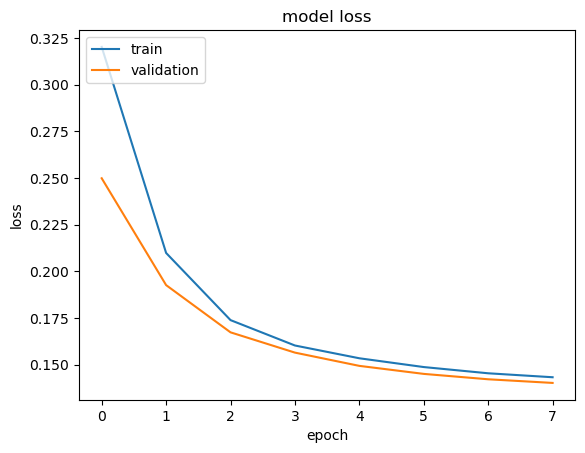

In [23]:
print(history.history.keys())
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()